# Problema da Caixeiro Viajante
## Implementação Thread

In [44]:
import time as t
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [45]:
%%writefile caixeiro_thread.py
import random
import sys
from threading import Thread

def gerar_combinacao_inicial(qtd_cidades):
    combinacao = [x for x in range(1, qtd_cidades)]
    return combinacao

def gera_matriz_custo(qtd_cidades, dist_max, dist_min):
    random.seed(12)
    matriz_custo = []
    for cid_origem in range(qtd_cidades):
        matriz_custo.append([])
        for cid_destino in range(qtd_cidades):
            if cid_origem < cid_destino:
                matriz_custo[cid_origem].append(random.randint(dist_max, dist_min))
            else:
                matriz_custo[cid_origem].append(0)

    print('** CIDADE **')
    for cid_origem in range(qtd_cidades):
        print(matriz_custo[cid_origem])
    return matriz_custo

def melhor_combinacao(melhores_combinacoes):
    melhor_combinacao = melhores_combinacoes[0][0]
    melhor_custo = melhores_combinacoes[0][1]
    combinacoes = []
    for combinacao in melhores_combinacoes:
        if combinacao[1] < melhor_custo:
            melhor_custo = combinacao[1]
            melhor_combinacao = combinacao[0]
            combinacoes = [combinacao]
        elif combinacao[1] == melhor_custo:
            combinacoes.append(combinacao)
    return combinacoes

def calcular_custos(lista, matriz_custo):
        custo = 0
        for pos_dest in range(1,len(lista)):
            if lista[pos_dest] > lista[pos_dest-1]:
                custo += matriz_custo[lista[pos_dest-1]][lista[pos_dest]]
            else:
                custo += matriz_custo[lista[pos_dest]][lista[pos_dest-1]]
        return custo

def permutacoes(lista):
    if len(lista) == 0:
        return[[]]
    combinacoes = []
    for i in range(len(lista)):
        valor_atual = lista[i]
        lista_restante = lista[:i]+lista[i+1:]
        lista_permutacoes = permutacoes(lista_restante)
        for permutacao in lista_permutacoes:
            combinacoes.append([valor_atual]+permutacao)
    return combinacoes


class Th(Thread):
    def __init__(self, matriz_custo, lista_cidades, cidade_faltante, tid):
        Thread.__init__(self)
        self.matriz_custo = matriz_custo
        self.lista_cidades = lista_cidades
        self.cidade_faltante = cidade_faltante
        self.tid = tid

    def run(self):
        melhores_combinacoes = []
        lista_cidades = self.lista_cidades
        cidade_faltante = self.cidade_faltante
        combinacoes = permutacoes(lista_cidades)
        for combinacao in combinacoes:
            combinacao.insert(0, cidade_faltante)
            combinacao.insert(0, 0)
            combinacao.append(0)
            custo = calcular_custos(combinacao, self.matriz_custo)
            if melhores_combinacoes == []:
                melhores_combinacoes = [[combinacao, custo, self.tid]]
            elif custo < melhores_combinacoes[0][1]:
                melhores_combinacoes = [[combinacao, custo, self.tid]]
            elif custo == melhores_combinacoes[0][1]:
                melhores_combinacoes.append([combinacao, custo, self.tid])
        self.melhores_combinacoes = melhores_combinacoes

    def retorna_melhores_combinacoes(self):
        return self.melhores_combinacoes


def main():
    QTD_CIDADES = int(sys.argv[1])
    DIST_MAX = int(sys.argv[2])
    DIST_MIN = int(sys.argv[3])
    IMPRESSAO = sys.argv[4]

    matriz_custo = gera_matriz_custo(QTD_CIDADES, DIST_MAX, DIST_MIN)
    combinacao_inicial = gerar_combinacao_inicial(QTD_CIDADES)

    threads = []
    for i in range(1, QTD_CIDADES):
        lista_cidades = combinacao_inicial[:i-1]+combinacao_inicial[i:]
        cidade_faltante = i
        threads.append(Th(matriz_custo, lista_cidades, cidade_faltante, i-1))
        threads[i-1].start()

    melhores_combinacoes = []
    for t in threads:
        t.join()
        melhores_combinacoes += t.retorna_melhores_combinacoes()

    melhores_combinacoes = melhor_combinacao(melhores_combinacoes)

    print()
    if IMPRESSAO == "'True'":
        print('** MELHORES COMBINACOES **')
        for combinacao in melhores_combinacoes:
            print('Combinacao: ', combinacao[0], 'Custo: ', combinacao[1], 'Thread: ', combinacao[2])


if __name__ == "__main__":
    main()


Overwriting caixeiro_thread.py


## Teste do código thread com passagem de parâmetros

In [46]:
# Teste QTD_CIDADES, DIST_MIN, DIST_MAX, PRINT
!python caixeiro_thread.py 11 2 9 'True'

** CIDADE **
[0, 9, 6, 7, 4, 8, 2, 7, 9, 6, 9]
[0, 0, 5, 2, 4, 9, 7, 4, 7, 5, 2]
[0, 0, 0, 5, 3, 7, 8, 3, 2, 2, 5]
[0, 0, 0, 0, 3, 8, 9, 3, 8, 4, 7]
[0, 0, 0, 0, 0, 4, 2, 4, 3, 8, 8]
[0, 0, 0, 0, 0, 0, 9, 9, 8, 2, 3]
[0, 0, 0, 0, 0, 0, 0, 5, 6, 7, 7]
[0, 0, 0, 0, 0, 0, 0, 0, 8, 6, 3]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 6, 5]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

** MELHORES COMBINACOES **
Combinacao:  [0, 4, 8, 2, 9, 5, 10, 1, 3, 7, 6, 0] Custo:  30 Thread:  3
Combinacao:  [0, 6, 4, 8, 2, 7, 3, 1, 10, 5, 9, 0] Custo:  30 Thread:  5
Combinacao:  [0, 6, 4, 8, 2, 9, 5, 10, 1, 3, 7, 0] Custo:  30 Thread:  5
Combinacao:  [0, 6, 7, 3, 1, 10, 5, 9, 2, 8, 4, 0] Custo:  30 Thread:  5
Combinacao:  [0, 7, 3, 1, 10, 5, 9, 2, 8, 4, 6, 0] Custo:  30 Thread:  6
Combinacao:  [0, 9, 5, 10, 1, 3, 7, 2, 8, 4, 6, 0] Custo:  30 Thread:  8


## Definição de constantes

In [47]:
QTD_CIDADES   = 11
DIST_MIN      = 2
DIST_MAX      = 9

## Fazendo testes de complexidade 
### <font color='Red'>(Execução Demorada!)</font>

In [48]:
# Teste de estresse
tempo_exec=[]
tempo_teorico=[]
for i in range(5, QTD_CIDADES+1):
    tempo_atual = t.time()
    # Teste QTD_CIDADES, DIST_MIN, DIST_MAX
    string = 'python caixeiro_thread.py '+str(QTD_CIDADES)+' '+str(DIST_MIN)+' '+\
                str(DIST_MAX)+' \'False\' > NUL' #Jogando a saida para null para não poluir o terminal
    !$string
    tempo_final = t.time()
    tempo_final -= tempo_atual
    tempo_exec.append((i,tempo_final))
    #Comparando os resultados com os valores de f(i) = 2*f(i-1)
    tempo_teorico.append((i+1, tempo_final*DIST_MAX))
print(tempo_exec)
print(tempo_teorico)

[(5, 15.352533102035522), (6, 15.355893611907959), (7, 15.528666257858276), (8, 15.25351357460022), (9, 15.247942209243774), (10, 15.429485559463501), (11, 15.220994710922241)]
[(6, 138.1727979183197), (7, 138.20304250717163), (8, 139.7579963207245), (9, 137.28162217140198), (10, 137.23147988319397), (11, 138.8653700351715), (12, 136.98895239830017)]


## Gráfico de complexidade X Tamanho da List

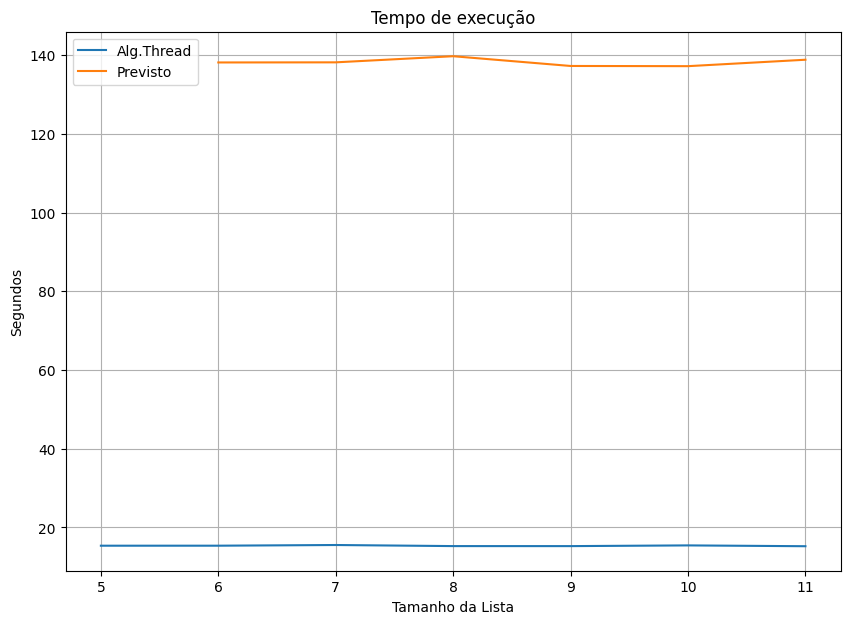

In [49]:
plt.figure(figsize=(10,7))
plt.plot([tempo_exec[i][0] for i in range(len(tempo_exec))], [tempo_exec[i][1] for i in range(len(tempo_exec))], label='Alg.Thread')
plt.plot([tempo_teorico[i][0] for i in range(len(tempo_teorico)-1)], [tempo_teorico[i][1] for i in range(len(tempo_teorico)-1)], label='Previsto')
plt.title('Tempo de execução')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Segundos')
plt.legend()
plt.grid()
plt.show()

## Fazendo testes com constantes definidas (1000 testes) 
### <font color='Red'>(Execução Demorada!)</font>
### Novas constantes para os testes

In [50]:
QTD_CIDADES   = 11
DIST_MIN      = 2
DIST_MAX      = 9

In [51]:
TAM_POP   = 200  # Tamanho da População

In [52]:
# Teste de estresse 2
tempo_exec2=[]
for i in range(TAM_POP):
    tempo_atual = t.time()
    # Teste QTD_CIDADES, DIST_MIN, DIST_MAX
    string = 'python caixeiro_thread.py '+str(QTD_CIDADES)+' '+str(DIST_MIN)+' '+str(DIST_MAX)+' '+'\'False\''+' > NUL' #Jogando a saida para null para não poluir o terminal
    !$string
    tempo_final = t.time()
    tempo_final -= tempo_atual
    tempo_exec2.append((i,tempo_final))
    print('Execução: %d - Tempo: %.4f seg.' %(i, tempo_final))
#print(tempo_exec2)

Execução: 0 - Tempo: 15.5750 seg.
Execução: 1 - Tempo: 15.5618 seg.
Execução: 2 - Tempo: 15.5618 seg.
Execução: 3 - Tempo: 15.4426 seg.
Execução: 4 - Tempo: 16.0668 seg.
Execução: 5 - Tempo: 15.6257 seg.
Execução: 6 - Tempo: 15.6262 seg.
Execução: 7 - Tempo: 15.3786 seg.
Execução: 8 - Tempo: 15.6503 seg.
Execução: 9 - Tempo: 15.5359 seg.
Execução: 10 - Tempo: 15.5643 seg.
Execução: 11 - Tempo: 15.3723 seg.
Execução: 12 - Tempo: 15.3594 seg.
Execução: 13 - Tempo: 15.5700 seg.
Execução: 14 - Tempo: 15.4261 seg.
Execução: 15 - Tempo: 15.5067 seg.
Execução: 16 - Tempo: 15.7969 seg.
Execução: 17 - Tempo: 15.9095 seg.
Execução: 18 - Tempo: 15.8956 seg.
Execução: 19 - Tempo: 15.3878 seg.
Execução: 20 - Tempo: 15.4152 seg.
Execução: 21 - Tempo: 15.4026 seg.
Execução: 22 - Tempo: 15.3668 seg.
Execução: 23 - Tempo: 15.5954 seg.
Execução: 24 - Tempo: 15.5317 seg.
Execução: 25 - Tempo: 15.5760 seg.
Execução: 26 - Tempo: 15.4370 seg.
Execução: 27 - Tempo: 15.4355 seg.
Execução: 28 - Tempo: 15.4843 

## Transfomando dados para 'numpy' para uso estatístico
<H3><font color='Red'>Só rodar se a célula anterior for executada</font></H3>

In [53]:
tempo_exec2 = np.array(tempo_exec2)
np.savetxt('dataset_multi_thread.txt', tempo_exec2, fmt='%f')
#tempo_exec2

# Análise Estatística

## Leitura do Dataset

In [54]:
# Lendo o dataset armazenado
tempo_exec2 = np.loadtxt('dataset_multi_thread.txt', dtype = float)

## Gráfico de disperção no tempo de execução

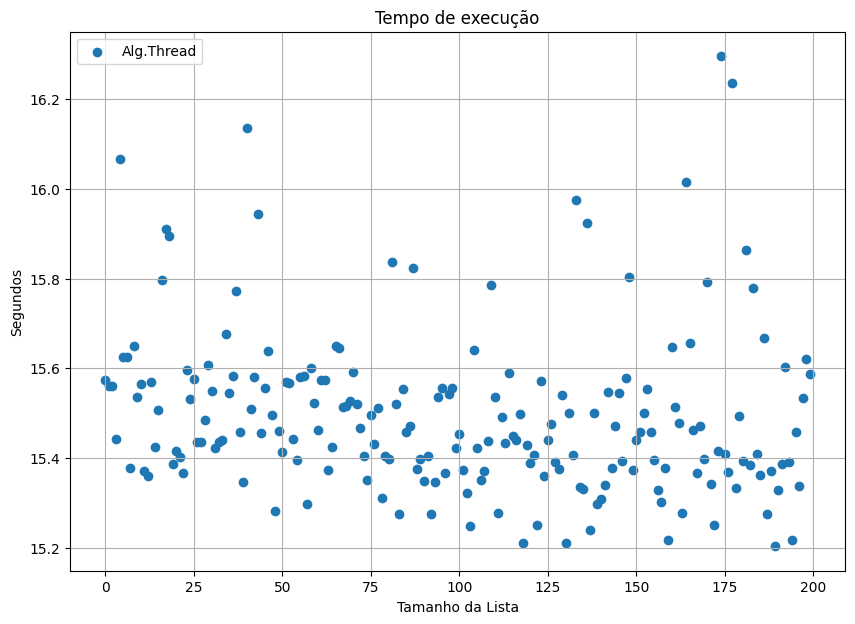

In [55]:
plt.figure(figsize=(10,7))
plt.scatter(tempo_exec2[:,0], tempo_exec2[:,1], label='Alg.Thread')
plt.title('Tempo de execução')
plt.xlabel('Tamanho da Lista')
plt.ylabel('Segundos')
plt.legend()
plt.grid()
plt.show()

## Cálculo de valores centrais:
### (Média, Mediana, Moda)

In [56]:
# Média
tempo_exec2_media = tempo_exec2[:,1].mean()
print('Tempo médio de execução %.4f' %tempo_exec2_media)

Tempo médio de execução 15.4952


In [57]:
# Desvio Padrão
tempo_exec2_std = tempo_exec2[:,1].std()
print('Desvio padrão %.4f' %tempo_exec2_std)

Desvio padrão 0.1809


In [58]:
# Médiana
tempo_exec2_mediana = np.median(tempo_exec2[:,1])
print('Tempo mediano de execuçao %.4f' %tempo_exec2_mediana)

Tempo mediano de execuçao 15.4587


## Análise Frequências

Não é possivel calcular a moda de uma população de valores numéricos contínuos. Neste caso podemos aplicar a **Regra de Sturges** para calcular a frequência da distribuição da amostra.
$$k = 1 + \frac {10}{3}\log_{10}n$$

In [59]:
# Cálculo do intervalo de freqûencia: n = Tamanho da Amostra
n = tempo_exec2.shape[0]
k = 1 + (10/3)*np.log10(n)
k = int(k.round(0))
print(f'Tamanho da Amostra: {k}')

Tamanho da Amostra: 9


In [60]:
# Coletando a frequência
tempo_exec2_freq = np.histogram(tempo_exec2[:,1], bins= k)
print(tempo_exec2_freq)

(array([21, 73, 56, 31,  6,  6,  3,  2,  2], dtype=int64), array([15.204169  , 15.32535378, 15.44653856, 15.56772333, 15.68890811,
       15.81009289, 15.93127767, 16.05246244, 16.17364722, 16.294832  ]))


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


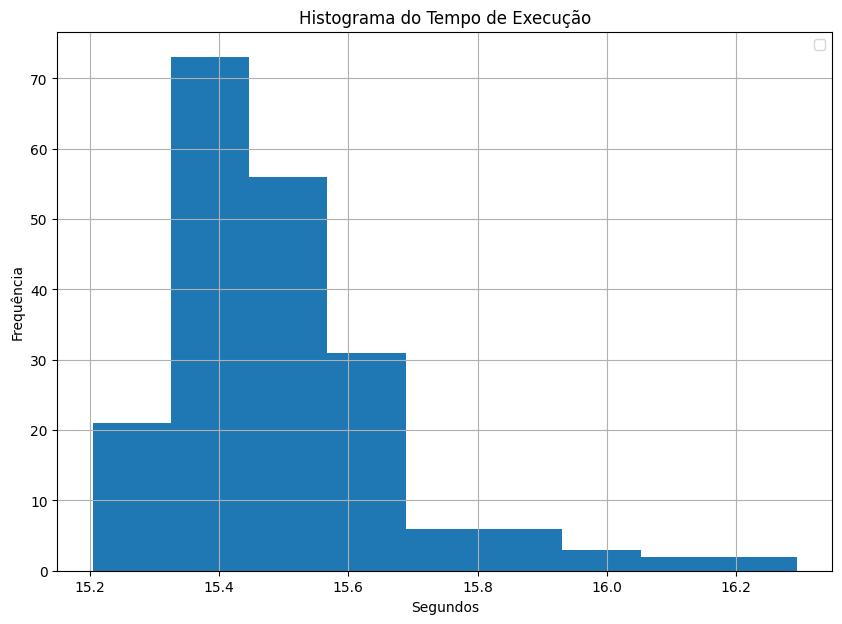

In [61]:
plt.figure(figsize=(10,7))
plt.hist(tempo_exec2[:,1], bins = k)
plt.title('Histograma do Tempo de Execução')
plt.ylabel('Frequência')
plt.xlabel('Segundos')
plt.legend()
plt.grid()
plt.show()

### **Verificando a possbilidade de dados OUTLIERS**
**Medidas Separatrizes**: Quartis

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


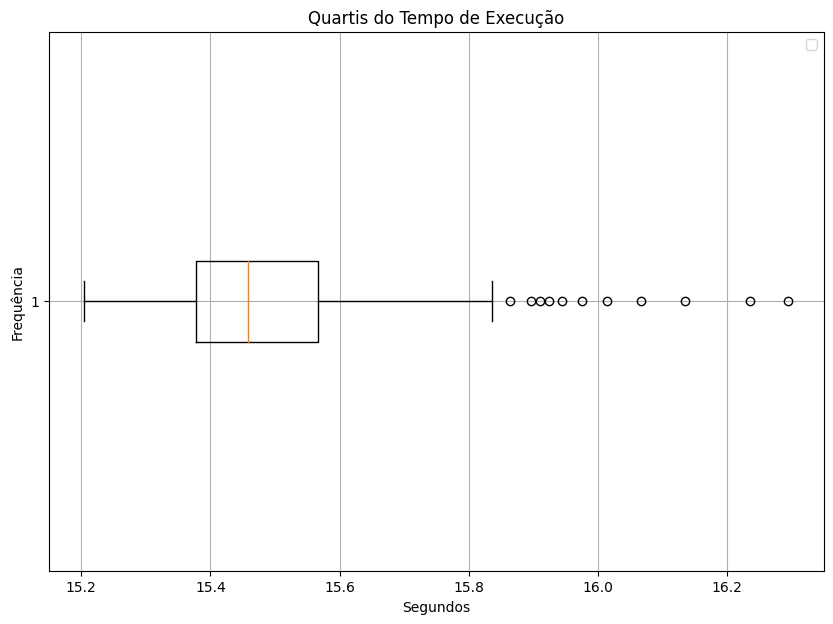

In [62]:
# Gráfico BoxPlot
plt.figure(figsize=(10,7))
plt.boxplot(tempo_exec2[:,1], vert = False)
plt.title('Quartis do Tempo de Execução')
plt.ylabel('Frequência')
plt.xlabel('Segundos')
plt.legend()
plt.grid()
plt.show()

### **Removendo dados "extremos" - Outliers**
#### <font color='Red'> Ajustar os valores antes de executar </font>

In [63]:
# Remover valores da lista
int_sup = tempo_exec2_media + (2 * tempo_exec2_std)
int_inf = tempo_exec2_media - (2 * tempo_exec2_std)
print(f'Nº de registros originais: {tempo_exec2.shape[0]}')
registros = []
for i in range(tempo_exec2.shape[0]):
        if int_inf > tempo_exec2[i, 1] or tempo_exec2[i, 1] > int_sup:
            registros.append(i)
print(f'Qtd. de registros removidos: {len(registros)}')
print(f'Registros removidos: {registros}')
tempo_exec2 = np.delete(tempo_exec2, registros, 0)
print(f'Nº de registros corrigidos: {tempo_exec2.shape[0]}')
print(tempo_exec2[0:15])

Nº de registros originais: 200
Qtd. de registros removidos: 11
Registros removidos: [4, 17, 18, 40, 43, 133, 136, 164, 174, 177, 181]
Nº de registros corrigidos: 189
[[ 0.       15.574957]
 [ 1.       15.561766]
 [ 2.       15.561801]
 [ 3.       15.44258 ]
 [ 5.       15.625653]
 [ 6.       15.626167]
 [ 7.       15.378587]
 [ 8.       15.650345]
 [ 9.       15.535939]
 [10.       15.564266]
 [11.       15.372269]
 [12.       15.35945 ]
 [13.       15.569997]
 [14.       15.426079]
 [15.       15.506652]]


### Salvando os registros corrigidos

In [64]:
np.savetxt('dataset_multi_thread_corrigido.txt', tempo_exec2, fmt='%f')

In [65]:
# Média
tempo_exec2_media = tempo_exec2[:,1].mean()
print('Tempo médio de execução %f' %tempo_exec2_media)

Tempo médio de execução 15.464483


In [66]:
# Desvio Padrão
tempo_exec2_std = tempo_exec2[:,1].std()
print('Desvio padrão %.4f' %tempo_exec2_std)

Desvio padrão 0.1278


In [67]:
# Médiana
tempo_exec2_mediana = np.median(tempo_exec2[:,1])
print('Tempo mediano de execuçao %.4f' %tempo_exec2_mediana)

Tempo mediano de execuçao 15.4492


## Estatística - DISTRIBUIÇÕES DE PROBABILIDADE

### Distribuição Normal

#### Amostra (Média da População)

In [68]:
# Parâmetros para uma media de amostragens
tam_amost = 50
qtd_amost = 200

In [69]:
# Obtendo a media de amostragens
amostra = []
for i in range(qtd_amost):
    amostra.append(np.random.choice(tempo_exec2[:,1], tam_amost).mean())
amostra = np.array(amostra)

In [70]:
# Valores Centrais da amostragem
amostra_media   = amostra.mean()
amostra_std     = amostra.std()
amostra_mediana = np.median(amostra)
print('** Valores Centrais da Amostra **')
print('Média da amostra:       %.4f' %amostra_media)
print('Desv.Padrão da amostra: %.4f' %amostra_std)
print('Mediana da amostra:     %.4f' %amostra_mediana)

** Valores Centrais da Amostra **
Média da amostra:       15.4647
Desv.Padrão da amostra: 0.0172
Mediana da amostra:     15.4641


In [71]:
# Desvio Padrão de inferência calculado
round(tempo_exec2_std / np.sqrt(tam_amost),4)

0.0181

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


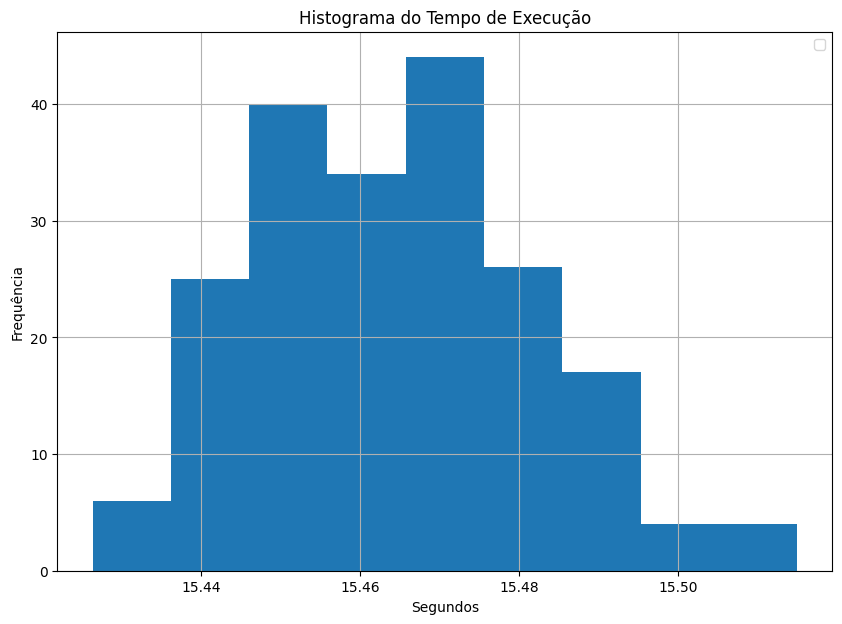

In [72]:
# Visualizando a amostra:
plt.figure(figsize=(10,7))
plt.hist(amostra, bins = k)
plt.title('Histograma do Tempo de Execução')
plt.ylabel('Frequência')
plt.xlabel('Segundos')
plt.legend()
plt.grid()
plt.show()

In [73]:
# Considerando a confiança de 99%
intervalo = norm.interval(alpha = 0.99, loc = amostra_media, scale = amostra_std)

C:\Users\Thiago\AppData\Local\Temp\ipykernel_62416\3257524375.py:2: DeprecationWarning: Use of keyword argument 'alpha' for method 'interval' is deprecated and wil be removed in SciPy 1.11.0. Use first positional argument or keyword argument 'confidence' instead.
  intervalo = norm.interval(alpha = 0.99, loc = amostra_media, scale = amostra_std)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


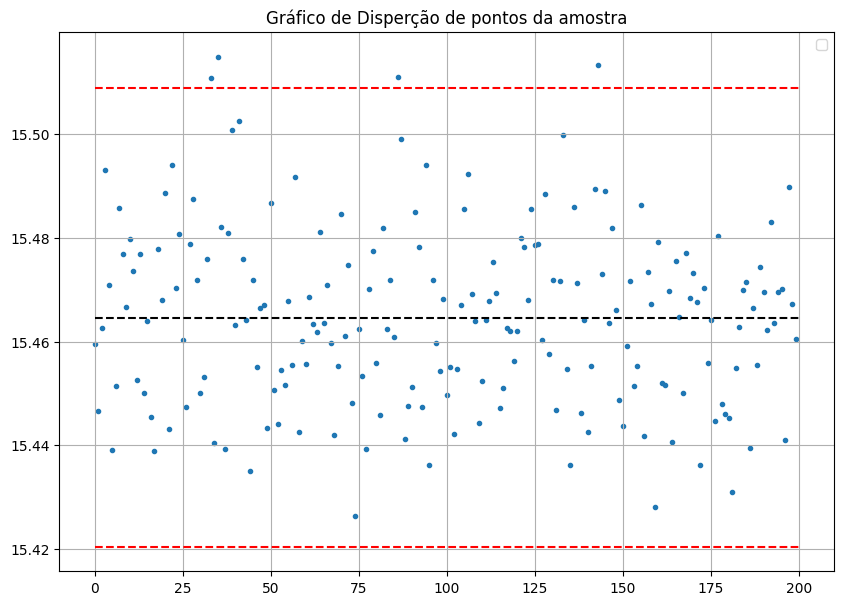

In [74]:
# Visualizando a disperção de Pontos da Amostra
plt.figure(figsize=(10,7))
plt.scatter([i for i in range(qtd_amost)], amostra, marker='.')
plt.hlines(y=intervalo[0], xmin=0, xmax=qtd_amost, color='red', linestyles='dashed')
plt.hlines(y=intervalo[1], xmin=0, xmax=qtd_amost, color='red', linestyles='dashed')
plt.hlines(y=amostra_media, xmin=0, xmax=qtd_amost, color='black', linestyles='dashed')
plt.title('Gráfico de Disperção de pontos da amostra')
plt.legend()
plt.grid()
plt.show()